In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import neuromodels as nm
import numpy as np
import pandas as pd
import seaborn as sns
import pylfi 

from pymoo.mcdm.pseudo_weights import PseudoWeights

# Set fontsizes in figures
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'legend.fontsize': 'large',
          'legend.handlelength': 2}
plt.rcParams.update(params)
#plt.rc('text', usetex=True)

sns.set(context="paper", style='whitegrid', rc={"axes.facecolor": "0.98"})


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: master@c4a0daab5
 Built: Aug 13 2021 01:17:10

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



## Create observed sum stats

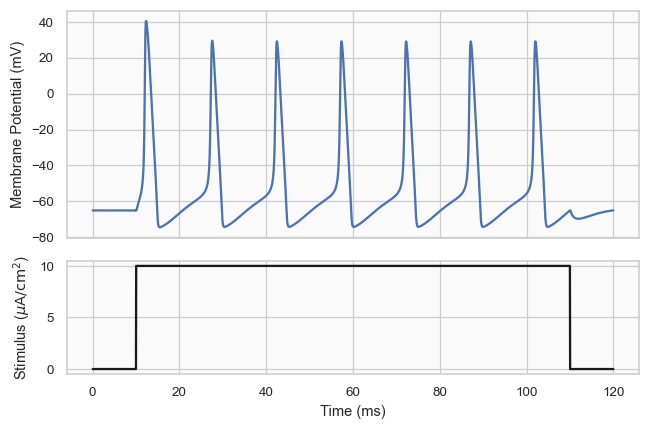

Spike rate: 0.0700 mHz
Latency to first spike: 2.3000 ms
Average AP overshoot: 30.7316 mV
Average AHP depth: -63.6200 mV
Average AP width: 2.0501 mV
Accommodation index: 0.0000


In [2]:
# Simulation parameters 
T = 120           # Simulation time [ms]
dt = 0.025        # Time step [ms]
I_amp = 10        # Input stimuls amplitude [microA/cm^2]
t_stim_on = 10    # Stimulus onset [ms]
t_stim_off = 110  # Stimulus offset [ms]

# Define input stimulus
# Can be defined as a constant, a callable with signature '(t)' or an array of values
class ConstantStimulus:
    def __init__(self, I_amp, t_stim_on, t_stim_off):
        self.I_amp = I_amp
        self.t_stim_on = t_stim_on
        self.t_stim_off = t_stim_off

    def __call__(self, t):
        return self.I_amp if self.t_stim_on <= t <= self.t_stim_off else 0

stimulus = ConstantStimulus(I_amp, t_stim_on, t_stim_off)

# Create instance of simulator. 
# Model parameters must be passed to constructor
hh = nm.models.HodgkinHuxley(stimulus, T, dt)

# Instance is callable and returns simulation results. 
# The conductance parameters can be passed as parameters
V, t = hh(gbar_K=36., gbar_Na=120.)

# Plot simulation
hh.plot_voltage_trace(with_stim=True, figsize=(6, 4), dpi=110)
plt.show()

# spike statistics
s_stats = ["spike_rate",
           "latency_to_first_spike",
           "average_AP_overshoot",
           "average_AHP_depth",
           "average_AP_width",
           "accommodation_index"]

# Create instance of spike statistics class
sps = nm.statistics.SpikeStats(t_stim_on=t_stim_on, 
                               t_stim_off=t_stim_off, 
                               stats=s_stats
                              )

# Instance is callable and returns the summary statistics
# passed to the 'stats' keyword in the constructor. 
# The simulation results must be passed as parameters. 
sum_stats = sps(V, t)

print(f"Spike rate: {sum_stats[0]:.4f} mHz")
print(f"Latency to first spike: {sum_stats[1]:.4f} ms")
print(f"Average AP overshoot: {sum_stats[2]:.4f} mV")
print(f"Average AHP depth: {sum_stats[3]:.4f} mV")
print(f"Average AP width: {sum_stats[4]:.4f} mV")
print(f"Accommodation index: {sum_stats[5]:.4f}")

In [3]:
s_obs = np.array(sum_stats)

## Create simulated sum stats

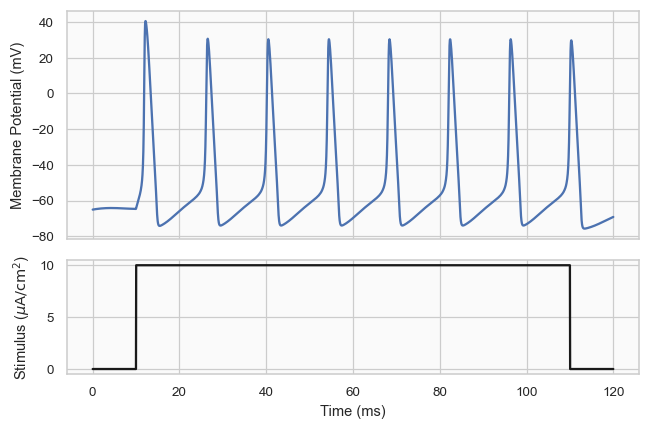

Spike rate: 0.0800 mHz
Latency to first spike: 2.1750 ms
Average AP overshoot: 31.5594 mV
Average AHP depth: -64.6991 mV
Average AP width: 2.2020 mV
Accommodation index: -0.0001


In [4]:
# Other parameters
V, t = hh(gbar_K=32., gbar_Na=117.)

# Plot simulation
hh.plot_voltage_trace(with_stim=True, figsize=(6, 4), dpi=110)
plt.show()

# spike statistics
s_stats = ["spike_rate",
           "latency_to_first_spike",
           "average_AP_overshoot",
           "average_AHP_depth",
           "average_AP_width",
           "accommodation_index"]

# Create instance of spike statistics class
sps = nm.statistics.SpikeStats(t_stim_on=t_stim_on, 
                               t_stim_off=t_stim_off, 
                               stats=s_stats
                              )

# Instance is callable and returns the summary statistics
# passed to the 'stats' keyword in the constructor. 
# The simulation results must be passed as parameters. 
sum_stats = sps(V, t)

print(f"Spike rate: {sum_stats[0]:.4f} mHz")
print(f"Latency to first spike: {sum_stats[1]:.4f} ms")
print(f"Average AP overshoot: {sum_stats[2]:.4f} mV")
print(f"Average AHP depth: {sum_stats[3]:.4f} mV")
print(f"Average AP width: {sum_stats[4]:.4f} mV")
print(f"Accommodation index: {sum_stats[5]:.4f}")

In [5]:
s_sim = np.array(sum_stats)

## Pseudo weights

In [6]:
F = np.array([[2, 13], [3, 11], [7, 9], [9, 4], [12, 3]])
_, w = PseudoWeights(np.array([0.5, 0.5])).do(F, return_pseudo_weights=True)
print(w)

[[1.         0.        ]
 [0.81818182 0.18181818]
 [0.55555556 0.44444444]
 [0.25       0.75      ]
 [0.         1.        ]]


In [7]:
F = np.array([[2, 13], [3, 11], [7, 9], [9, 4], [12, 3]])
_, w = PseudoWeights(np.array([1, 1])).do(F, return_pseudo_weights=True)
print(w)

[[1.         0.        ]
 [0.81818182 0.18181818]
 [0.55555556 0.44444444]
 [0.25       0.75      ]
 [0.         1.        ]]


## Summary Statistics Weights

**Relevant papers:**

* H. Jung and P. Marjoram (2011). "Choice of Summary Statistic Weights in Approximate Bayesian Computation". https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3192002/
    * Develops a Genetic Algorithm that computes how one should weight the summary statistics 
    * Fairly advanced, so we won't implement their approach, but should be mentioned in thesis
* D. Prangle (2015). "Adapting the ABC distance function". https://arxiv.org/pdf/1507.00874.pdf
    * Methods for adaptive distances
    * Won't implement this either, but will use the weighted distance defined in the paper
* S. Druckmann et al. (2007) "A novel multiple objective optimization framework for constraining conductance-based neuron models by experimental data". 
    * MOO
    
    
In the ABC algorithms, each simulation is converted to a vector of summary statistics $\mathbf{s} = (s_1, s_2, ..., s_m)$ and a distance between this and the summary statistics of the observed data, $\mathbf{s}_{obs}$, is calculated. Parameters producing distances below some threshold are accepted and form a sample from an approximation to the posterior. 

However, without normalization of the summary statistics, we are comparing oranges with apples. The most variable summaries will dominate the distances because of their larger scales. Handling the scales of the summaries ... blabla ... important.  

Normalizing the summaries so that they vary over roughly the same scale can be achieved by using a weighted Euclidean distance: 

$$ d \left(\mathbf{s}, \mathbf{s}_{obs} \right) = \left[ \sum_{i=1}^m \left( \frac{s_i - s_{obs, i}}{\sigma_i} \right)^2 \right]^{1/2},$$

where $\sigma_i$ is an estimate of the prior predictive standard deviation of the $i$th summary statistic. A convenient estimate is the empirical standard deviation of simulated $s_i$ values. The normalization we acquire from scaling by $\sigma_i$ prevents the distances from being dominated by the most variable summaries.  

Furthermore, we should also weight the importance of the summary statistics ...

## Correlation 

**Idea:** Use Pearson's Coefficient of Correlation to weight importance of summary statistics.

* This is a simple approach for producing weighted statistics 
    * Method developed by H. Jung and P. Marjoram (2011) is more advanced and likely better
* The correlation coefficient, $r$, relates $Y$ to $X$ 
* The squared correlation coefficient, $r^2$, indicates the proportion of variance in $Y$ that is shared with (or accounted for) by $X$.

**Cons of using Pearson's Coefficient of Correlation:**

* Assumes:
    1. Normality of data (meaning that the data should approximate the normal distribution; most data points should tend to hover close to the mean)
    2. Homoscedasticity (means ‘equal variances’), i.e. a situation in which the variance of the dependent variable is the same for all the data.
    3. Linearity; simply means that the data follows a linear relationship. 
* (2. and 3. can be checked visually by scatter plot)
* Is sensitive to outliers; outliers can can significantly skew the correlation coefficient and make it inaccurate. Outliers are also easy to spot visually from the scatter plot

* vekte utifra sensitivitet

In [8]:
T = 120           # Simulation time [ms]
dt = 0.025        # Time step [ms]
I_amp = 10        # Input stimuls amplitude [microA/cm^2]
t_stim_on = 10    # Stimulus onset [ms]
t_stim_off = 110  # Stimulus offset [ms]

class ConstantStimulus:
    def __init__(self, I_amp, t_stim_on, t_stim_off):
        self.I_amp = I_amp
        self.t_stim_on = t_stim_on
        self.t_stim_off = t_stim_off

    def __call__(self, t):
        return self.I_amp if self.t_stim_on <= t <= self.t_stim_off else 0

stimulus = ConstantStimulus(I_amp, t_stim_on, t_stim_off)

hh = nm.models.HodgkinHuxley(stimulus, T, dt)

# spike statistics
s_stats = ["spike_rate",
           "latency_to_first_spike",
           "average_AP_overshoot",
           "average_AHP_depth",
           "average_AP_width",
           "accommodation_index"]

# Create instance of spike statistics class
sps = nm.statistics.SpikeStats(t_stim_on=t_stim_on, 
                               t_stim_off=t_stim_off, 
                               stats=s_stats
                              )

In [9]:
N = 10

gbarK_prior = pylfi.Prior('uniform', loc=30, scale=10, name='gbarK')
gbarNa_prior = pylfi.Prior('uniform', loc=115, scale=10, name='gbarNa')


gbarKs = gbarK_prior.rvs(100)
gbarNas = gbarNa_prior.rvs(100)

In [10]:
sum_stats = []
for gbarK, gbarNa in zip(gbarKs, gbarNas):
    V, t = hh(gbar_K=gbarK, gbar_Na=gbarNa)
    sum_stats.append(sps(V, t))

In [11]:
data = dict(zip(s_stats, np.stack(sum_stats, axis=-1)))
df = pd.DataFrame.from_dict(data)
df.insert(0, "gbarK", gbarKs)
df.insert(1, "gbarNa", gbarNas)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
# TODO reindex
df

,gbarK,gbarNa,spike_rate,latency_to_first_spike,average_AP_overshoot,average_AHP_depth,average_AP_width,accommodation_index
0,34.151320,121.546608,0.07,2.200,32.004967,-63.541988,2.033252,-1.752848e-04
1,38.455430,118.833379,0.07,2.350,27.252644,-63.703064,1.994105,4.014870e-03
2,33.665909,123.374935,0.08,2.175,32.279488,-64.849693,2.292508,4.436557e-04
3,30.451322,116.921427,0.08,2.200,32.191934,-64.597995,2.182224,1.527650e-04
4,34.194803,119.818497,0.07,2.275,31.570684,-63.529951,2.023034,-1.740644e-04
...,...,...,...,...,...,...,...,...
95,32.442028,122.920483,0.08,2.175,32.731565,-64.775767,2.271063,-8.567004e-17
96,35.737302,117.263673,0.07,2.250,30.052909,-63.583468,2.016593,-1.662510e-04
97,33.141479,122.919856,0.08,2.200,32.414810,-64.816726,2.270079,6.355232e-17
98,37.690085,123.544872,0.07,2.175,30.760145,-63.722757,2.099307,-1.643385e-04


#### Empirical scales 

In [12]:
df["spike_rate"].std()

0.005642455773231649

In [13]:
df["spike_rate"].mad()

0.005133541449878599

#### Compute correlation

In [14]:
r_gbarK = df["gbarK"].corr(df["spike_rate"], method='pearson')
r2_gbarK = r_gbarK**2

r_gbarNa = df["gbarNa"].corr(df["spike_rate"], method='pearson')
r2_gbarNa = r_gbarNa**2

weight = np.mean([r2_gbarK, r2_gbarNa]) 

print(f"{r_gbarK=}")
print(f"{r2_gbarK=}")
print(f"{r_gbarNa=}")
print(f"{r2_gbarNa=}")
print(f"{weight=}")

r_gbarK=-0.8308939529894926
r2_gbarK=0.6903847611145052
r_gbarNa=0.08667911854562234
r2_gbarNa=0.007513269591846051
weight=0.34894901535317563


In [15]:
sds = []
mads = []
weights = []

for stat in s_stats:
    
    sd = df[stat].std()
    mad = df[stat].mad()
    
    r_gbarK = df["gbarK"].corr(df[stat], method='pearson')
    r2_gbarK = r_gbarK**2

    r_gbarNa = df["gbarNa"].corr(df[stat], method='pearson')
    r2_gbarNa = r_gbarNa**2

    weight = np.mean([r2_gbarK, r2_gbarNa]) 
    
    sds.append(sd)
    mads.append(mad)
    weights.append(weight)
    
    print(stat)
    print("-"*30)
    print(f"{sd=}")
    print(f"{mad=}")
    
    print("")
    print(f"{r_gbarK=}")
    print(f"{r2_gbarK=}")
    
    print("")
    print(f"{r_gbarNa=}")
    print(f"{r2_gbarNa=}")
    
    print("")
    print(f"{weight=}")
    print("")

spike_rate
------------------------------
sd=0.005642455773231649
mad=0.005133541449878599

r_gbarK=-0.8308939529894926
r2_gbarK=0.6903847611145052

r_gbarNa=0.08667911854562234
r2_gbarNa=0.007513269591846051

weight=0.34894901535317563

latency_to_first_spike
------------------------------
sd=0.05382597753759344
mad=0.04342120476355643

r_gbarK=0.4821617040719633
r2_gbarK=0.2324799088735795

r_gbarNa=-0.19057440563024797
r2_gbarNa=0.03631860408132229

weight=0.13439925647745088

average_AP_overshoot
------------------------------
sd=1.7046253854703737
mad=1.324492157592733

r_gbarK=-0.8112225245648194
r2_gbarK=0.6580819843613189

r_gbarNa=0.3182860301733574
r2_gbarNa=0.10130599700351536

weight=0.37969399068241716

average_AHP_depth
------------------------------
sd=0.6874275920415303
mad=0.5771365941252231

r_gbarK=0.7297517449842608
r2_gbarK=0.5325376093075735

r_gbarNa=-0.18207688206698208
r2_gbarNa=0.0331519909832337

weight=0.28284480014540364

average_AP_width
------------------

In [16]:
df2 = pd.DataFrame(data=list(zip(sds, mads, weights)),
                  columns=["SD", "MAD", "Weight"],
                  index=s_stats)
df2

,SD,MAD,Weight
spike_rate,0.005642,0.005134,0.348949
latency_to_first_spike,0.053826,0.043421,0.134399
average_AP_overshoot,1.704625,1.324492,0.379694
average_AHP_depth,0.687428,0.577137,0.282845
average_AP_width,0.129492,0.105281,0.282972
accommodation_index,0.000632,0.000291,0.055135


* Normalisere vektene til 1?
* Test

### Distance function

In [17]:
def wl2(s, s_obs, w, scale):
    """
    s: simulated summary statistics
    s_obs: observed summary statistics
    w: importance weights
    scale: scaling weights
    """
    q = (w * (s - s_obs)) / scale
    return np.sqrt((q * q).sum())

#### Distance currently in pyLFI

In [20]:
def euclidean(s1, s2):
    """Euclidean distance.

    Calculates the distance between two sets of summary statistics by pairwise
    computing the Euclidean distance and then averaging.

    Parameters
    ----------
    s1: array_like
        First set of summary statistics.
    s2: array_like
        Second set of summary statistics.

    Returns
    -------
    numpy.float
        The distance between the summary statistic sets.
    """

    if isinstance(s1, (int, float)):
        s1 = [s1]
    if isinstance(s2, (int, float)):
        s2 = [s2]

    s1 = np.asarray(s1)
    s2 = np.asarray(s2)

    if s1.ndim == 1:
        s1 = s1.reshape(-1, 1)

    if s2.ndim == 1:
        s2 = s2.reshape(-1, 1)

    if s1.shape != s2.shape:
        msg = ("The observed and simulated sets of summary statistics must "
               "have equal shape, i.e. the same number of summary statistics."
               "\nDebug tip: Double-check that the passed 'observation' is "
               "a set of summary statistics and not the raw observed data.")
        raise RuntimeError(msg)

    dist = np.linalg.norm(s1 - s2, ord=2, axis=1)

    return dist.mean()

## Compute distances

In [18]:
print(s_obs)
print(s_sim)

[ 7.00000000e-02  2.30000000e+00  3.07315595e+01 -6.36200453e+01
  2.05013324e+00  2.38437160e-17]
[ 8.00000000e-02  2.17500000e+00  3.15593988e+01 -6.46990682e+01
  2.20201277e+00 -1.48942270e-04]


In [24]:
dist = euclidean(s_sim, s_obs)
print("Equally weighted:", dist)

Equally weighted: 0.3656484548998562


In [26]:
w = 1
scale = 1

dist2 = wl2(s_sim, s_obs, w, scale)
print("Check new function:", dist)

Check new function: 0.3656484548998562


In [27]:
w = 1
scale = np.array(sds)

dist3 = wl2(s_sim, s_obs, w, scale)
print("Scaled with SD:", dist3)

Scaled with SD: 3.5587735597867236


In [28]:
w = 1
scale = np.array(mads)

dist4 = wl2(s_sim, s_obs, w, scale)
print("Scaled with MAD:", dist4)

Scaled with MAD: 4.27923273626724


In [29]:
w = np.array(weights)
scale = 1

dist5 = wl2(s_sim, s_obs, w, scale)
print("With importance weights:", dist5)

With importance weights: 0.44055271186830613


In [30]:
w = np.array(weights)
scale = np.array(sds)

dist6 = wl2(s_sim, s_obs, w, scale)
print("With importance weights and scale SD:", dist6)

With importance weights and scale SD: 0.9062610482513963


In [31]:
w = np.array(weights)
scale = np.array(mads)

dist7 = wl2(s_sim, s_obs, w, scale)
print("With importance weights and scale MAD:", dist7)

With importance weights and scale MAD: 1.056005964541372


In [32]:
w = np.array(weights)
scale = np.array(mads)

dist8 = wl2(s_obs, s_obs, w, scale)
print("Sanity check:", dist8)

Sanity check: 0.0


In [33]:
print(w.sum())

1.483993285664441


In [35]:
w2 = w / np.sum(w)
print(w2)
print(np.sum(w2))

[0.23514191 0.09056595 0.25585964 0.19059709 0.1906825  0.03715291]
1.0


In [36]:
print(sds)

[0.005642455773231649, 0.05382597753759344, 1.7046253854703737, 0.6874275920415303, 0.12949201564346335, 0.0006322033040264965]


In [37]:
print(mads)

[0.005133541449878599, 0.04342120476355643, 1.324492157592733, 0.5771365941252231, 0.10528066752986871, 0.00029063943717396053]


## Plot

* 3. plott med gbarK på x og gbarNa på y

<Figure size 576x288 with 0 Axes>

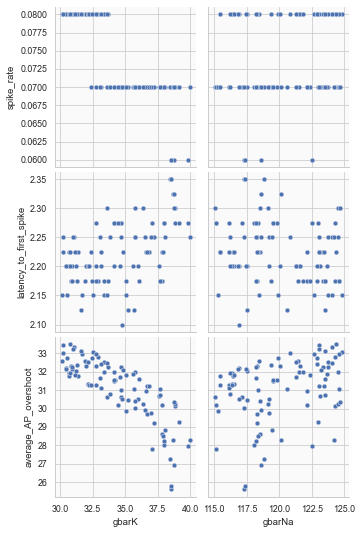

In [21]:
fig = plt.figure(figsize=(8, 4))
sns.pairplot(data=df,
             y_vars=s_stats[:3],
             x_vars=['gbarK', 'gbarNa']
            )
plt.show()

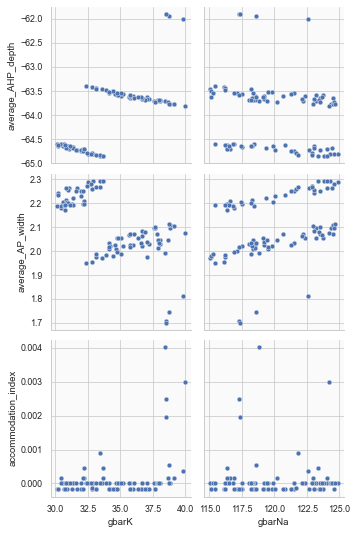

In [22]:
sns.pairplot(data=df,
             y_vars=s_stats[3:],
             x_vars=['gbarK', 'gbarNa']
            )

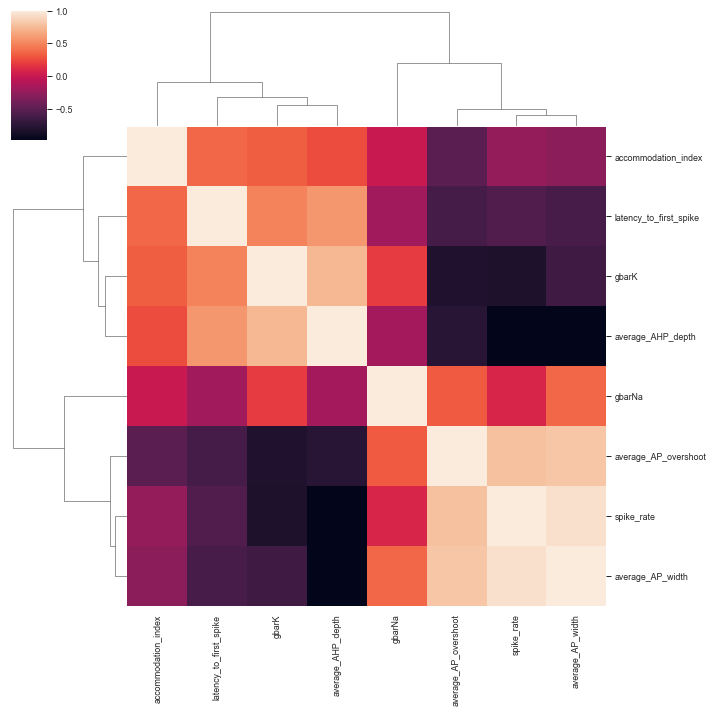

In [23]:
sns.clustermap(df.corr())